In [ ]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path='/content/drive/MyDrive/animals/'
print(os.listdir(folder_path))

['cats', 'panda', 'dogs']


**List All Categories from Folder**


In [ ]:
categories = []
for c in os.listdir(folder_path):
    categories.append(c)
print(categories)

['cats', 'panda', 'dogs']


**Load and Label Training Images**

In [ ]:
train_data = []
for c in categories:
    path = os.path.join(folder_path, c)
    class_num = categories.index(c)
    print(path, class_num)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path, img))
        img_arr = cv.resize(img_arr, (64, 64), interpolation=cv.INTER_AREA)

        train_data.append([img_arr, class_num])
print()
print(len(train_data))

/content/drive/MyDrive/animals/cats 0


100%|██████████| 100/100 [00:03<00:00, 29.14it/s]


/content/drive/MyDrive/animals/panda 1


100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


/content/drive/MyDrive/animals/dogs 2


100%|██████████| 100/100 [00:02<00:00, 44.73it/s] 


300


Display First 50 Grayscale Training Images with Category Labels

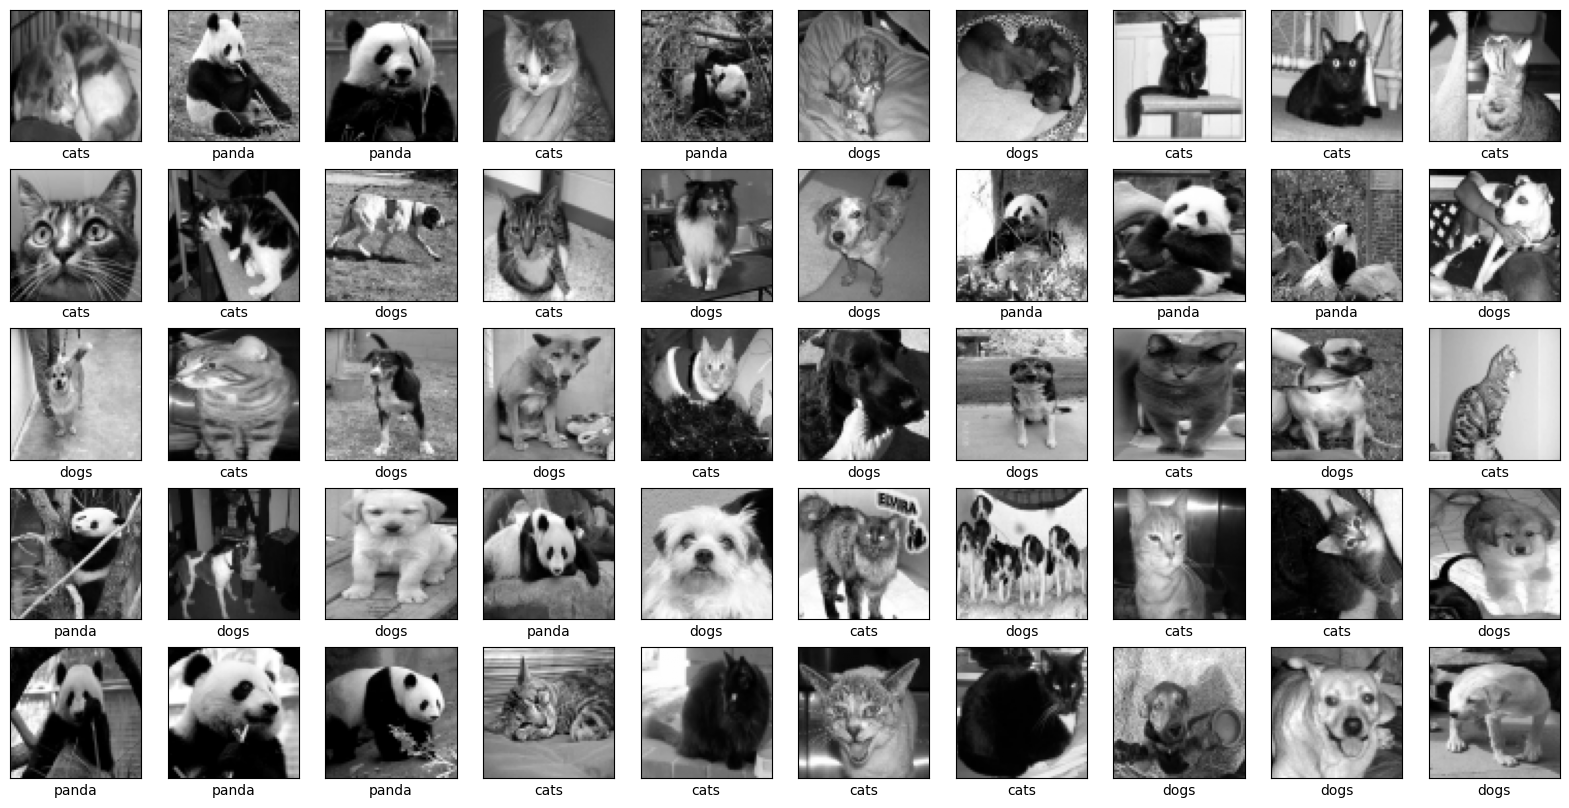

In [ ]:
random.shuffle(train_data)

plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5, 10, i+1)
    image = train_data[i][0]
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(image_gray, cmap="gray")
    plt.xlabel(categories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    plt.axis()
    if i == 50:
        break
plt.show()

In [ ]:
Folds = []
for i in range(5):
    Folds.append(train_data[i::5])
len(Folds)
for i, fold in enumerate(Folds):
    print(f"Fold {i+1}: Count: {len(fold)}")

Fold 1: Count: 60
Fold 2: Count: 60
Fold 3: Count: 60
Fold 4: Count: 60
Fold 5: Count: 60


**Compute L2 (Euclidean) Distance Between Two Vectors**



In [ ]:
def l2_distance(valid_fold, train_fold):
    return np.sqrt(np.sum(np.square(valid_fold - train_fold)))

In [ ]:
from collections import Counter
def knn_predict(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    return Counter(labels).most_common(1)[0][0]

**K-Fold Cross-Validation for KNN with Varying k (1 to 20)**

In [ ]:
fold_results = []
average_results = []

                                                                                 # Loop through k values from 1 to 30
for k_value in range(1, 21):
    fold_accuracies = []

                                                                                # Loop through each fold as the validation set
    for fold_index in range(len(Folds)):
        validation_set = Folds[fold_index]
        training_set = [item for j, fold in enumerate(Folds) if j != fold_index for item in fold]

        predictions = []
        for val_img in validation_set:
                                                                                # Calculate distances between validation image and all training images
            distances = [(l2_distance(val_img[0], train_img[0]), train_img[1]) for train_img in training_set]
            distances.sort()

                                                                                 # Predict label based on k nearest neighbors
            predicted_label = knn_predict(distances, k_value)
            predictions.append(1 if predicted_label == val_img[1] else 0)

                                                                                 # Calculate accuracy for this fold
        fold_accuracy = sum(predictions) / len(predictions)
        fold_accuracies.append(fold_accuracy)

                                                                                # Store accuracies and calculate average accuracy for this k
    fold_results.append(fold_accuracies)
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    average_results.append(avg_accuracy)
    print(f"K: {k_value} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_results}")

                                                                                # Plotting the results


K: 1 Average Accuracy: 0.40
K: 2 Average Accuracy: 0.40
K: 3 Average Accuracy: 0.42
K: 4 Average Accuracy: 0.43
K: 5 Average Accuracy: 0.42
K: 6 Average Accuracy: 0.45
K: 7 Average Accuracy: 0.44
K: 8 Average Accuracy: 0.44
K: 9 Average Accuracy: 0.46
K: 10 Average Accuracy: 0.40
K: 11 Average Accuracy: 0.41
K: 12 Average Accuracy: 0.39
K: 13 Average Accuracy: 0.43
K: 14 Average Accuracy: 0.41
K: 15 Average Accuracy: 0.43
K: 16 Average Accuracy: 0.44
K: 17 Average Accuracy: 0.44
K: 18 Average Accuracy: 0.45
K: 19 Average Accuracy: 0.46
K: 20 Average Accuracy: 0.46
Fold Accuracies: [[0.38333333333333336, 0.31666666666666665, 0.4, 0.4666666666666667, 0.4166666666666667], [0.38333333333333336, 0.31666666666666665, 0.4, 0.4666666666666667, 0.4166666666666667], [0.4166666666666667, 0.36666666666666664, 0.38333333333333336, 0.5, 0.43333333333333335], [0.38333333333333336, 0.45, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335], [0.4666666666666667, 0.35, 0.45, 0.38333333333333336

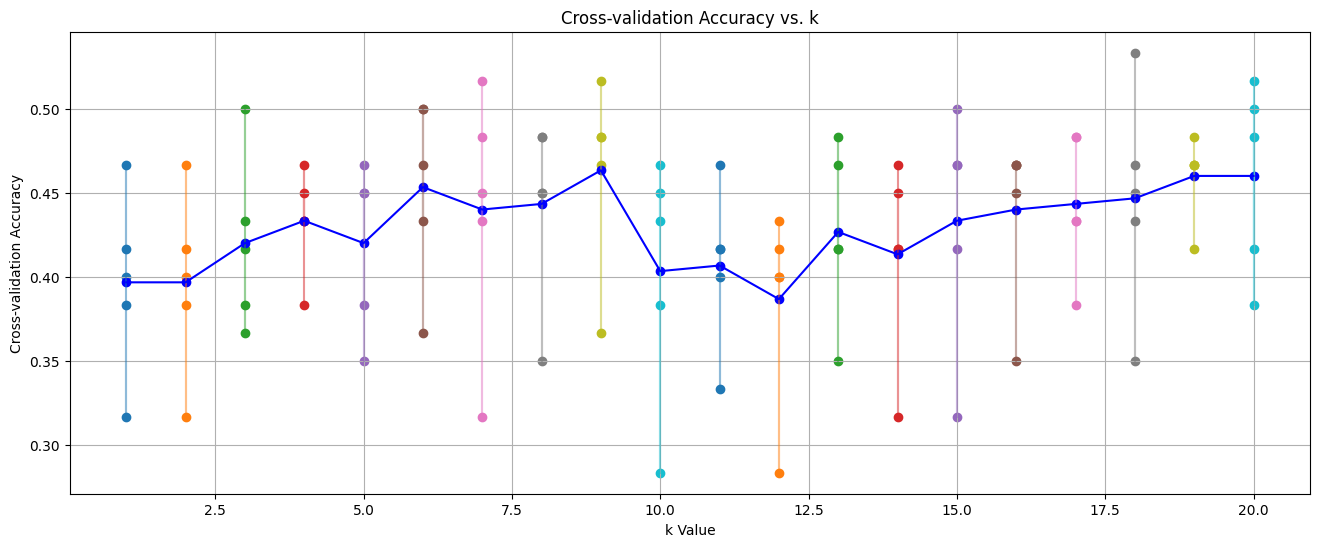

In [ ]:
plt.figure(figsize=(16, 6))
                                                                                # Scatter plot for fold accuracies
for k_index, fold_accuracy in enumerate(fold_results):
    plt.scatter([k_index + 1] * len(fold_accuracy), fold_accuracy)
    plt.plot([k_index+1] * len(fold_accuracy), fold_accuracy, linestyle='-', alpha=0.5)
                                                                               # Line plot for average accuracies
plt.plot(range(1, 21), average_results, color='blue')
plt.scatter(range(1, 21), average_results, color='blue')

plt.xlabel('k Value')
plt.ylabel('Cross-validation Accuracy')
plt.title('Cross-validation Accuracy vs. k')
plt.grid(True)
plt.show()